https://github.com/mrdbourke/tensorflow-deep-learning


## 1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?


The loss decreases slower with lower learning rate and higher with higher learnign rate, but high values of the learning rate might make the loss fluctuate and not decrease

## 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
[Playground Link](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true)

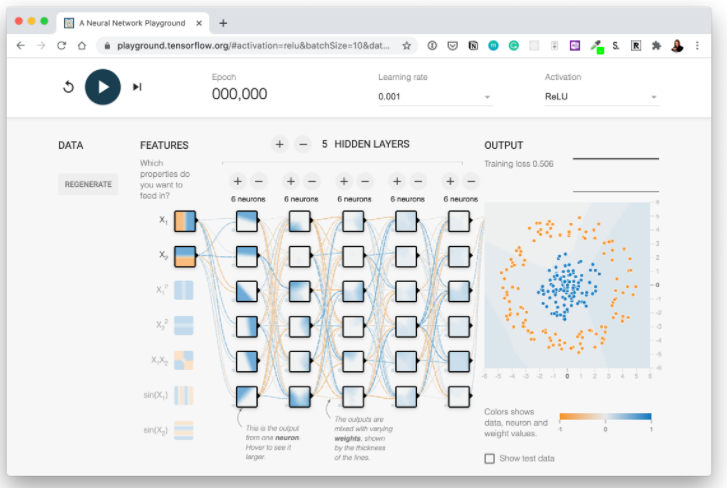


In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation="relu", input_shape=(None, 2)),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [3]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 6)           18        
                                                                 
 dense_1 (Dense)             (None, None, 6)           42        
                                                                 
 dense_2 (Dense)             (None, None, 6)           42        
                                                                 
 dense_3 (Dense)             (None, None, 6)           42        
                                                                 
 dense_4 (Dense)             (None, None, 6)           42        
                                                                 
 dense_5 (Dense)             (None, None, 1)           7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable pa

## 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons()

X.shape, y.shape

((100, 2), (100,))

In [5]:
X

array([[-9.81559157e-01,  1.91158629e-01],
       [ 7.18349350e-01,  6.95682551e-01],
       [ 1.87131870e+00,  9.28244800e-03],
       [-5.72116660e-01,  8.20172255e-01],
       [ 5.72116660e-01,  8.20172255e-01],
       [-3.20515776e-02,  9.99486216e-01],
       [ 1.09602303e+00, -4.95379113e-01],
       [-8.71318704e-01,  4.90717552e-01],
       [ 1.76144596e+00, -1.48228395e-01],
       [ 1.46253829e+00, -3.86599306e-01],
       [ 1.28681296e-01,  9.28244800e-03],
       [ 6.72300890e-01,  7.40277997e-01],
       [-4.62538290e-01,  8.86599306e-01],
       [-6.23489802e-01,  7.81831482e-01],
       [-9.26916757e-01,  3.75267005e-01],
       [ 9.00968868e-01,  4.33883739e-01],
       [ 9.03976974e-01, -4.95379113e-01],
       [ 3.76510198e-01, -2.81831482e-01],
       [ 8.01413622e-01,  5.98110530e-01],
       [ 9.49055747e-01,  3.15108218e-01],
       [ 4.81607432e-01, -3.55142763e-01],
       [-9.49055747e-01,  3.15108218e-01],
       [ 1.84408430e-02,  3.08841371e-01],
       [ 1.

In [6]:
y

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

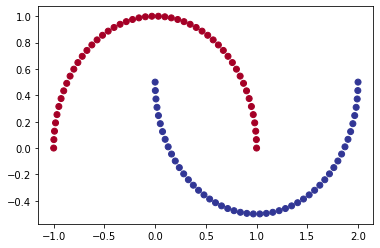

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
# Plot decision boundary function from notes

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # xx.shape = yy.shape = (100, 100)
  # xx.ravel().shape = (1000,)

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together 
  #(x_in.shape = (1000, 2)
  # x_in is the list of all the 2D points created by the meshgrid

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape) #reshape to 100x100 matrix as we have 10000 points

  # Plot the deicision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.colorbar()
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [9]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
4/4 [==============================] - 6s 10ms/step - loss: 0.7016 - accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6869 - accuracy: 0.5100
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6802 - accuracy: 0.5100
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6733 - accuracy: 0.5100
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6671 - accuracy: 0.5200
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6609 - accuracy: 0.5200
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6547 - accuracy: 0.5200
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6490 - accuracy: 0.5300
Epoch 10/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6434 - accuracy: 0.5300
Epoch 11/100
4/4 [========

In [10]:
# Evaluate the model
model_2.evaluate(X, y)

4/4 [==============================] - 0s 9ms/step - loss: 0.3736 - accuracy: 0.8800


[0.37357085943222046, 0.8799999952316284]

doing binary classification


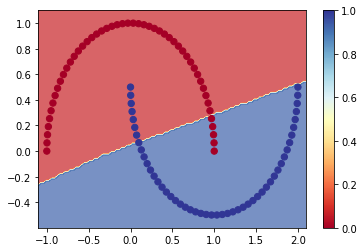

In [11]:
plot_decision_boundary(model_2, X, y)

In [12]:
# Improve the model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 8ms/step - loss: 0.6633 - accuracy: 0.7400
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6423 - accuracy: 0.8400
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6226 - accuracy: 0.8400
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6035 - accuracy: 0.8600
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 0.5847 - accuracy: 0.8500
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5677 - accuracy: 0.8400
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 0.5520 - accuracy: 0.8500
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5350 - accuracy: 0.8400
Epoch 9/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5202 - accuracy: 0.8500
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5070 - accuracy: 0.8500
Epoch 11/200
4/4 [===========

In [13]:
# Evaluate the model
model_2.evaluate(X, y)

4/4 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.8800


[0.37357085943222046, 0.8799999952316284]

doing binary classification


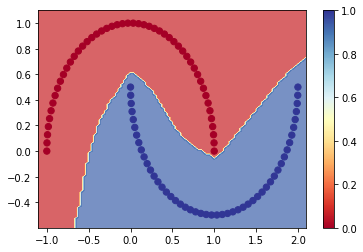

In [14]:
plot_decision_boundary(model_3, X, y)

## 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [15]:
# Import dataset
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [16]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [17]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

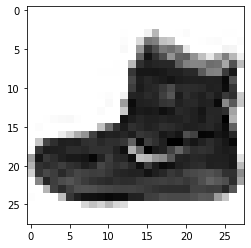

In [18]:
plt.imshow(train_data[0], cmap=plt.cm.binary)

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover",	
               "Dress",	"Coat",	"Sandal",	"Shirt",	
               "Sneaker", "Bag",	"Ankle boot"]

len(class_names)

10

In [20]:
train_data.flatten().shape

(47040000,)

In [21]:
train_data.max(), train_data.min()

(255, 0)

In [22]:
# Normalize data
train_data_norm = train_data / 255
test_data_norm = test_data / 255

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_norm,
            train_labels,
            epochs=10,
            validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

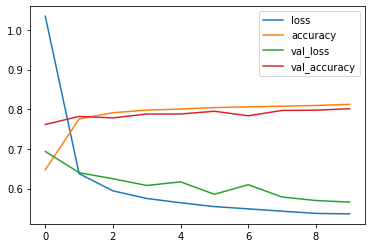

In [24]:
# Plot history
pd.DataFrame(history_3.history).plot()

In [25]:
# Improve the model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_norm,
            train_labels,
            epochs=10,
            validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5623 - accuracy: 0.8039 - val_loss: 0.4328 - val_accuracy: 0.8406
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3811 - accuracy: 0.8602 - val_loss: 0.4443 - val_accuracy: 0.8464
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3443 - accuracy: 0.8738 - val_loss: 0.3894 - val_accuracy: 0.8575
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3197 - accuracy: 0.8830 - val_loss: 0.3757 - val_accuracy: 0.8658
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3034 - accuracy: 0.8874 - val_loss: 0.3816 - val_accuracy: 0.8633
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2889 - accuracy: 0.8931 - val_loss: 0.3673 - val_accuracy: 0.8655
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2805 - accuracy: 0.8956 - val_loss: 0.3777 - val_accuracy:

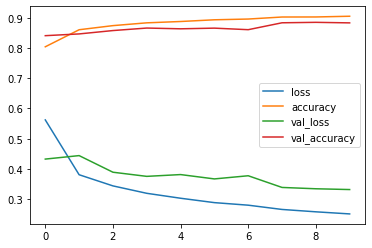

In [26]:
# Plot history
pd.DataFrame(history_4.history).plot()

In [27]:
y_pred = model_4.predict(test_data_norm)
y_pred

array([[2.63783051e-07, 1.45447856e-07, 1.63564651e-09, ...,
        6.75197691e-03, 5.14224254e-08, 9.92774606e-01],
       [3.79990961e-05, 1.05028519e-09, 9.97439623e-01, ...,
        5.72087167e-23, 5.00340391e-08, 8.84468415e-16],
       [1.59314439e-07, 9.99999762e-01, 5.17900584e-11, ...,
        1.16548960e-29, 1.97705446e-11, 4.24860602e-21],
       ...,
       [5.96850587e-04, 1.02980232e-06, 1.03918464e-04, ...,
        6.56307986e-09, 9.98173118e-01, 6.90542623e-10],
       [1.33200132e-07, 9.99993443e-01, 2.79409451e-09, ...,
        3.08664485e-21, 7.14259207e-10, 1.37349899e-14],
       [1.32642335e-05, 2.92777735e-09, 1.89883238e-07, ...,
        6.07536291e-04, 3.00143991e-04, 7.22557206e-06]], dtype=float32)

In [28]:
# Convert all of the prediction probabilities into integers
y_pred = y_pred.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [29]:
y_pred_names = [class_names[x] for x in y_pred]
y_pred_names

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker',
 'Coat',
 'Sandal',
 'Sandal',
 'Dress',
 'Coat',
 'Trouser',
 'Pullover',
 'Pullover',
 'Bag',
 'T-shirt/top',
 'Pullover',
 'Sandal',
 'Sneaker',
 'Sandal',
 'Trouser',
 'Pullover',
 'Shirt',
 'T-shirt/top',
 'Ankle boot',
 'Dress',
 'Bag',
 'Bag',
 'Dress',
 'Dress',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sandal',
 'Sneaker',
 'Ankle boot',
 'T-shirt/top',
 'Trouser',
 'Shirt',
 'Sneaker',
 'Shirt',
 'Sneaker',
 'Pullover',
 'Trouser',
 'Pullover',
 'Shirt',
 'Coat',
 'Pullover',
 'Sandal',
 'Bag',
 'Pullover',
 'Pullover',
 'Bag',
 'Coat',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sneaker',
 'Bag',
 'Sandal',
 'Trouser',
 'Trouser',
 'T-shirt/top',
 'Dress',
 'Sneaker',
 'Bag',
 'Sneaker',
 'T-shirt/top',
 'Pullover',
 'Shirt',
 'Coat',
 'Dress',
 'Trouser',
 'Pullover',
 'Bag',
 'Coat',
 'Trouser',
 'Bag',
 'Sandal',
 'Ankle boot',
 'Sandal',
 'T-shirt/top',
 'Dress',
 'P

In [30]:
y_true_names = [class_names[x] for x in test_labels]

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_true_names, y_pred=y_pred_names, labels=class_names)
cm

array([[868,   2,   9,  30,   3,   2,  80,   0,   6,   0],
       [  4, 966,   2,  24,   2,   0,   1,   0,   1,   0],
       [ 24,   1, 775,  15, 121,   0,  63,   0,   1,   0],
       [ 25,   9,   5, 917,  23,   0,  18,   0,   3,   0],
       [  0,   2,  81,  38, 831,   0,  48,   0,   0,   0],
       [  0,   0,   0,   1,   0, 957,   0,  21,   1,  20],
       [170,   3,  76,  34,  74,   1, 637,   0,   5,   0],
       [  0,   0,   0,   0,   0,  23,   0, 947,   0,  30],
       [  2,   2,   4,   8,   5,   4,   4,   3, 968,   0],
       [  0,   0,   0,   0,   0,   6,   1,  30,   0, 963]])

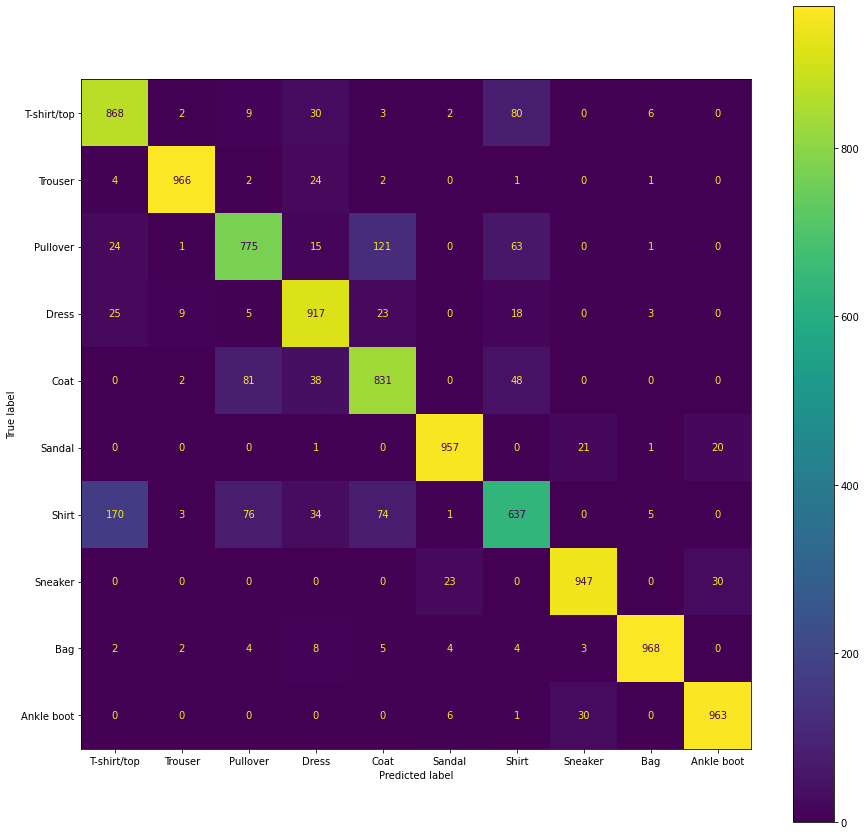

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)

## 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [33]:
inputs = tf.random.normal(shape=(32, 10))
outputs = tf.keras.activations.softmax(inputs)
tf.reduce_sum(outputs[0, :])  # Each sample in the batch now sums to 1


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [34]:
outputs

<tf.Tensor: shape=(32, 10), dtype=float32, numpy=
array([[0.06060961, 0.03097388, 0.02862213, 0.19908527, 0.14242674,
        0.08892405, 0.15289968, 0.05116381, 0.00731666, 0.23797815],
       [0.12861116, 0.08966157, 0.05693548, 0.07112629, 0.03365053,
        0.21283053, 0.09975607, 0.03607794, 0.22315203, 0.04819835],
       [0.30776995, 0.16017862, 0.08251644, 0.0184713 , 0.02295707,
        0.17377637, 0.01043038, 0.06307861, 0.07261208, 0.0882092 ],
       [0.4379076 , 0.05062516, 0.03161429, 0.06186139, 0.13143729,
        0.08088218, 0.03247763, 0.06260677, 0.01377218, 0.09681544],
       [0.02644425, 0.12650824, 0.03565289, 0.084929  , 0.0791027 ,
        0.22686921, 0.03550185, 0.26183257, 0.0576841 , 0.06547518],
       [0.10375612, 0.25390875, 0.0436872 , 0.10268481, 0.3297619 ,
        0.04952871, 0.01811885, 0.03928342, 0.02596303, 0.03330717],
       [0.08906367, 0.0263358 , 0.07575371, 0.27844825, 0.18243885,
        0.23507403, 0.03568418, 0.00755631, 0.05147835, 0.01

In [35]:
tf.reduce_sum(tf.exp(inputs))

<tf.Tensor: shape=(), dtype=float32, numpy=556.3757>

In [36]:
def softmax(inputs):
  """
  Return the softmax activation of the inputs
  """
  probabilities = [tf.exp(x) / tf.reduce_sum(tf.exp(x)) for x in inputs]
  return tf.constant(tf.Variable(probabilities))

In [37]:
outputs_2 = softmax(inputs)
tf.reduce_sum(outputs_2[0, :])  # Each sample in the batch now sums to 1

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [38]:
outputs_2

<tf.Tensor: shape=(32, 10), dtype=float32, numpy=
array([[0.06060962, 0.03097388, 0.02862213, 0.19908525, 0.14242676,
        0.08892406, 0.15289968, 0.05116381, 0.00731666, 0.23797815],
       [0.12861118, 0.08966158, 0.05693548, 0.0711263 , 0.03365053,
        0.21283056, 0.09975606, 0.03607794, 0.22315206, 0.04819835],
       [0.30776995, 0.16017862, 0.08251644, 0.0184713 , 0.02295708,
        0.17377639, 0.01043038, 0.06307862, 0.07261208, 0.08820919],
       [0.43790767, 0.05062518, 0.0316143 , 0.0618614 , 0.1314373 ,
        0.08088218, 0.03247764, 0.06260678, 0.01377218, 0.09681546],
       [0.02644425, 0.12650822, 0.03565289, 0.084929  , 0.0791027 ,
        0.22686921, 0.03550185, 0.26183254, 0.05768409, 0.06547518],
       [0.10375613, 0.25390875, 0.0436872 , 0.10268481, 0.32976192,
        0.04952871, 0.01811885, 0.03928343, 0.02596302, 0.03330717],
       [0.08906368, 0.0263358 , 0.07575372, 0.27844828, 0.18243887,
        0.23507407, 0.03568418, 0.00755632, 0.05147836, 0.01

In [39]:
tf.reduce_sum(outputs - outputs_2) # total difference between tf softmax function and custom

<tf.Tensor: shape=(), dtype=float32, numpy=-1.8835999e-07>

## 6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [40]:
len(train_data)

60000

In [41]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array[i])
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array[i]),
                                class_names[true_label]),
                                color=color)

In [42]:
y_probs = model_4.predict(test_data_norm)

In [43]:
y_probs

array([[2.63783051e-07, 1.45447856e-07, 1.63564651e-09, ...,
        6.75197691e-03, 5.14224254e-08, 9.92774606e-01],
       [3.79990961e-05, 1.05028519e-09, 9.97439623e-01, ...,
        5.72087167e-23, 5.00340391e-08, 8.84468415e-16],
       [1.59314439e-07, 9.99999762e-01, 5.17900584e-11, ...,
        1.16548960e-29, 1.97705446e-11, 4.24860602e-21],
       ...,
       [5.96850587e-04, 1.02980232e-06, 1.03918464e-04, ...,
        6.56307986e-09, 9.98173118e-01, 6.90542623e-10],
       [1.33200132e-07, 9.99993443e-01, 2.79409451e-09, ...,
        3.08664485e-21, 7.14259207e-10, 1.37349899e-14],
       [1.32642335e-05, 2.92777735e-09, 1.89883238e-07, ...,
        6.07536291e-04, 3.00143991e-04, 7.22557206e-06]], dtype=float32)

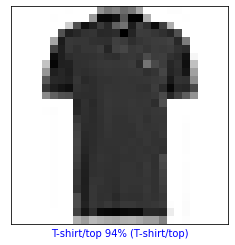

In [44]:
plot_image(959, y_probs, test_labels, test_data)

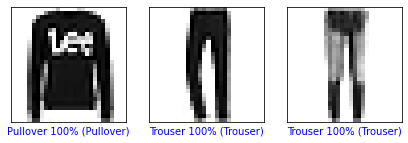

In [45]:
plt.figure(figsize=(7,7))
plt.subplot(1, 3, 1)
plot_image(1, y_probs, test_labels, test_data)
plt.subplot(1, 3, 2)
plot_image(2, y_probs, test_labels, test_data)
plt.subplot(1, 3, 3)
plot_image(3, y_probs, test_labels, test_data)

## 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [46]:
cosa = pd.DataFrame(test_labels, columns=["y_true"])
cosa

,y_true
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


In [47]:
cosa[cosa["y_true"] == 3].head(3).index

Int64Index([13, 29, 32], dtype='int64')

In [48]:
y_probs.shape

(10000, 10)

In [49]:
def plot_3_same_class(predictions_array, true_labels, images, class_names, class_to_find):
  class_index = class_names.index(class_to_find) 
  pred_df = pd.DataFrame(test_labels, columns=["y_true"])
  indices = pred_df[pred_df["y_true"] == class_index].head(3).index
  
  plt.figure(figsize=(7,7))
  plt.subplot(1, 3, 1)
  plot_image(indices[0], y_probs, test_labels, test_data)
  plt.subplot(1, 3, 2)
  plot_image(indices[1], y_probs, test_labels, test_data)
  plt.subplot(1, 3, 3)
  plot_image(indices[2], y_probs, test_labels, test_data)

In [50]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

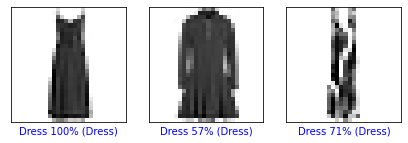

In [51]:
plot_3_same_class(y_probs, test_labels, test_data, class_names, "Dress")

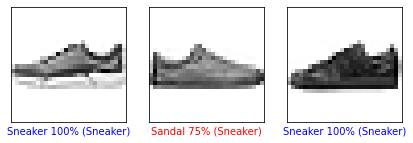

In [52]:
plot_3_same_class(y_probs, test_labels, test_data, class_names, "Sneaker")

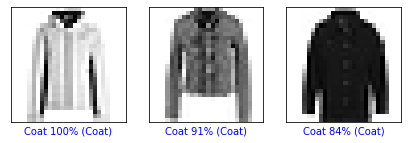

In [53]:
plot_3_same_class(y_probs, test_labels, test_data, class_names, "Coat")